
# Réduction de dimension avec PCA sur le dataset MNIST

---

### 1. Introduction & objectifs

## Objectifs du notebook

Ce notebook a pour but d’appliquer la **réduction de dimension par PCA** (Analyse en Composantes Principales) sur le dataset **MNIST**, qui contient des images de chiffres manuscrits représentées par 784 pixels (28x28). 

Nous allons :
- Comprendre le principe de la **PCA** (formellement et intuitivement),
- Charger et explorer les données,
- Réduire la dimension de 784 vers **2 ou 3 dimensions**,
- Visualiser les points dans ce nouvel espace,
- Interpréter les résultats et leurs limites.

---

### 2. Définition : Qu’est-ce que la PCA ?

## Qu'est-ce que la PCA ?

La **PCA (Principal Component Analysis)** est une technique **linéaire de réduction de dimension**.

Elle repose sur les idées suivantes :
- Trouver les directions (appelées **composantes principales**) qui capturent le **plus de variance** dans les données,
- Réordonner les axes pour que **chaque nouvelle dimension explique une partie décroissante de la variance totale**,
- Supprimer les dimensions les moins informatives.

Elle est particulièrement utile pour :
- **Visualiser des données complexes** en 2D ou 3D,
- **Réduire le bruit**,
- **Prétraiter** avant un apprentissage supervisé ou non supervisé.

**Attention** : La PCA est **linéaire**, donc elle ne capte pas les relations non linéaires dans les données.

### 3. Chargement des bibliothèques & configuration

In [1]:
# Chargement des librairies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Configuration
sns.set(style="whitegrid")
%matplotlib inline

### 4. Chargement du dataset MNIST (format CSV)

## Chargement du dataset MNIST

Nous utilisons ici une version CSV du dataset MNIST, composée de 70 000 lignes (images) et 785 colonnes :
- La première colonne est le **label** (le chiffre manuscrit : 0 à 9),
- Les 784 suivantes représentent les **pixels** d’une image 28x28, aplatie.

In [2]:
df = pd.read_csv("../data/mnist.csv")

# Vérifier les noms de colonnes
print(df.columns[:10])

# Utiliser la première colonne comme label
label_col = df.columns[0]
X = df.drop(label_col, axis=1)
y = df[label_col]

# Afficher les dimensions
print(f"Dimensions de X : {X.shape}")
print(f"Dimensions de y : {y.shape}")


Index(['5', '0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6', '0.7', '0.8'], dtype='object')
Dimensions de X : (69999, 784)
Dimensions de y : (69999,)


## Visualisation de quelques chiffres manuscrits

Chaque ligne du dataset représente une image 28x28 pixels, que nous pouvons reconstruire à partir des valeurs des colonnes.

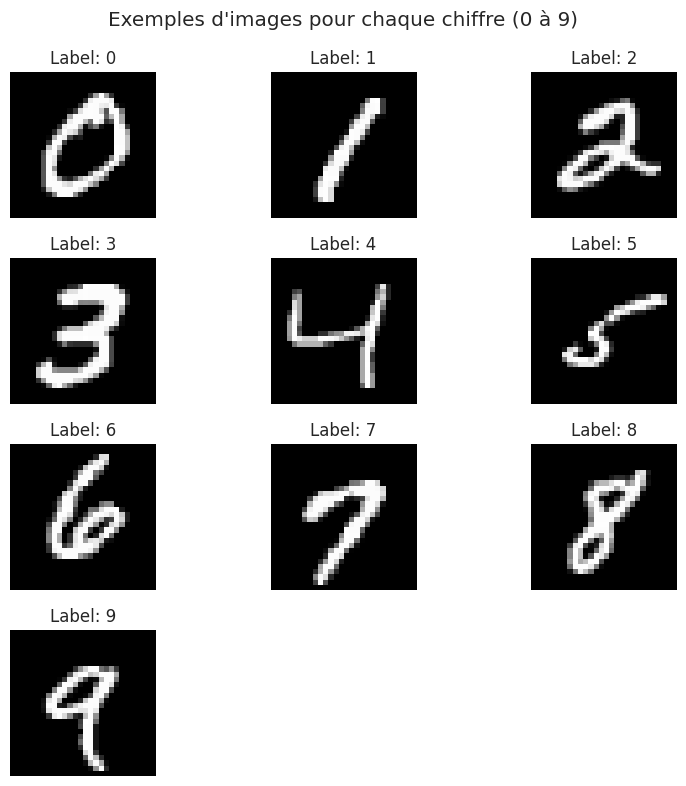

In [ ]:
# Afficher les 10 chiffres

plt.figure(figsize=(8, 8))
for i, digit in enumerate(range(10)):
    idx = y[y == digit].index[0]
    img = X.iloc[idx].values.reshape(28, 28)
    label = y.iloc[idx]

    plt.subplot(4, 3, i + 1)
    plt.imshow(img, cmap="gray")
    plt.title(f"Label: {label}")
    plt.axis("off")
plt.suptitle("Exemples d'images pour chaque chiffre (0 à 9)")
plt.tight_layout()
plt.show()

### 5. Standardisation des données

La PCA est **sensible aux échelles des variables**, car elle se base sur la variance.  
Nous devons donc **centrer et réduire** les données (moyenne = 0, écart-type = 1) avant d’appliquer la PCA.

In [5]:
# Standardisation avec StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Vérification
print("Forme des données standardisées :", X_scaled.shape)

Forme des données standardisées : (69999, 784)


### 6. Application de la PCA (2 dimensions)

Nous allons appliquer la PCA pour réduire les 784 dimensions à seulement **2 dimensions** afin de pouvoir visualiser les données dans un plan 2D.

In [6]:
# Réduction de dimension
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Nouvelle forme après PCA :", X_pca.shape)

Nouvelle forme après PCA : (69999, 2)


## Explications

Pour illustrer la PCA sur un jeu de données similaire à MNIST, imaginons une matrice où chaque ligne représente une "image" très simplifiée de 3 pixels (au lieu de 784), et chaque valeur correspond à l’intensité du pixel :

| Image | Pixel 1 | Pixel 2 | Pixel 3 |
|-------|---------|---------|---------|
|  A    |   0     |   0     |   0     |
|  B    | 255     | 255     |   0     |
|  C    |   0     | 255     | 255     |

- **Chaque ligne** = une image (A, B, C)
- **Chaque colonne** = un pixel (comme dans MNIST, mais ici seulement 3)

**Étapes de la PCA sur cette matrice :**
1. **Standardisation** : On centre et réduit chaque colonne (pixel).
2. **Calcul des composantes principales** :  
La PCA va chercher de nouveaux axes (appelés *composantes principales*) qui sont des combinaisons des pixels d’origine.  
- **Premier axe (PC1)** : c’est la direction dans l’espace des données où les images sont le plus différentes entre elles, c’est-à-dire là où la variance est la plus grande.  
- **Deuxième axe (PC2)** : c’est la direction qui explique le plus de différences possibles, mais qui est perpendiculaire au premier axe, et ainsi de suite pour les axes suivants.  
Autrement dit, ces axes sont choisis pour "résumer" au mieux l’information présente dans toutes les colonnes (pixels), en gardant ce qui varie le plus d’une image à l’autre.

3. **Projection** : Chaque image est projetée sur ces nouveaux axes (PC1, PC2, PC3).

Cet exemple montre comment la PCA peut résumer l’information de plusieurs pixels en quelques axes principaux, même sur des "images" très simplifiées.


## Visualisation 2D après PCA

Chaque point représente une image réduite à 2 composantes principales.
Les couleurs correspondent au chiffre manuscrit (label 0 à 9).


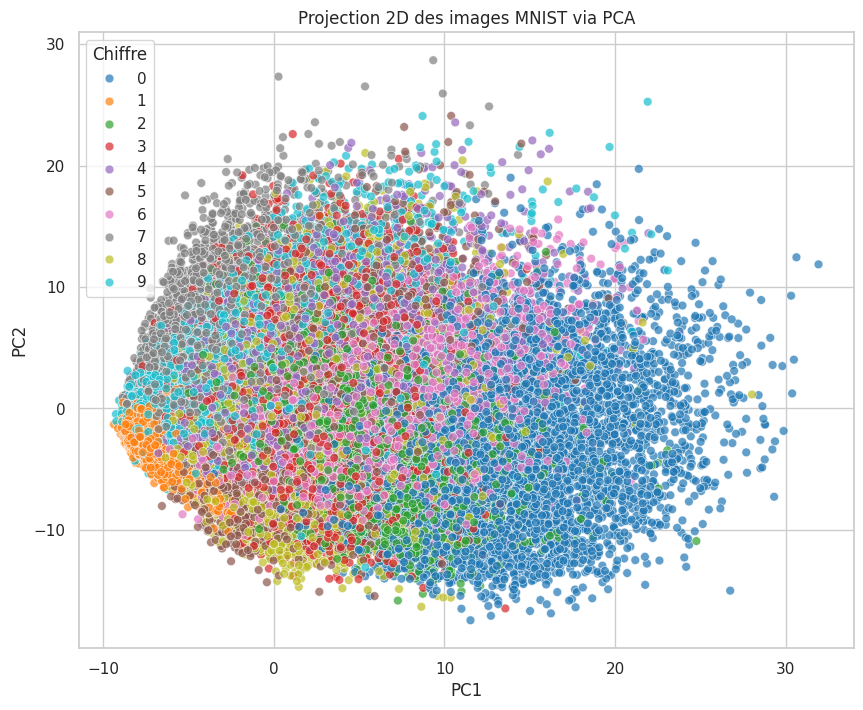

In [7]:
# Création d’un DataFrame pour visualisation
df_pca = pd.DataFrame({
    "PC1": X_pca[:, 0],
    "PC2": X_pca[:, 1],
    "label": y
})

plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=df_pca,
    x="PC1", y="PC2",
    hue="label",
    palette="tab10",
    alpha=0.7,
    s=40
)
plt.title("Projection 2D des images MNIST via PCA")
plt.legend(title="Chiffre")
plt.show()

## Interprétation du graphique PCA (2D)

- Chaque **point** représente une **image MNIST** (un chiffre manuscrit).
- Les **couleurs** indiquent le **label réel** (le chiffre de 0 à 9).
- Les **axes PC1 et PC2** sont les deux directions principales qui expliquent le plus de variance dans les images.

### Que remarque-t-on ?

- Il y a une **séparation partielle** entre certaines classes :
  - Les `0` (bleu) se regroupent bien dans une zone distincte.
  - Les `1` (orange) aussi, assez bien concentrés à gauche.
- Par contre, beaucoup de **classes se mélangent** :
  - Les chiffres `5`, `8`, `3` ou `7` se superposent souvent.
  - Cela signifie que ces chiffres ont des **formes visuellement proches**, même pour l'algorithme.

### Conclusion :

- La **PCA**, bien qu'utile pour la visualisation, ne capture **pas toujours parfaitement les différences complexes entre classes**.
- Elle reste **très utile pour explorer les structures globales** des données, mais elle est limitée aux **transformations linéaires**.


## Variance expliquée

Il est important de connaître la **quantité de variance capturée** par les 2 premières composantes.
Cela nous permet de savoir **quelle part d’information** des données initiales est conservée.

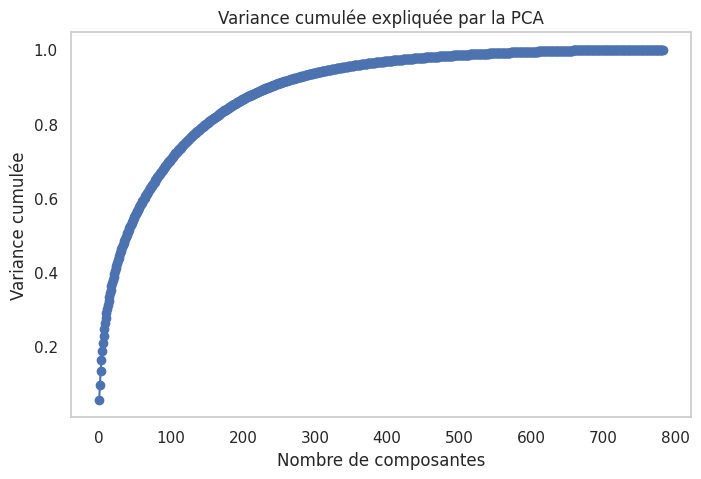

In [8]:
pca_full = PCA()
pca_full.fit(X_scaled)

# Variance cumulée
var_cumsum = np.cumsum(pca_full.explained_variance_ratio_)

plt.figure(figsize=(8, 5))
plt.plot(var_cumsum, marker="o")
plt.xlabel("Nombre de composantes")
plt.ylabel("Variance cumulée")
plt.title("Variance cumulée expliquée par la PCA")
plt.grid()
plt.show()

Ce graphique montre **combien de variance totale** est expliquée par les **n premières composantes principales**.

### Que montre cette courbe ?

- L’axe horizontal représente le **nombre de composantes** utilisées.
- L’axe vertical représente la **proportion cumulée de variance expliquée**.
- La courbe commence **à gauche** avec très peu de composantes (1, 2, 3…), puis continue jusqu’à 784.

### Observations importantes :

- Avec **~50 composantes**, on récupère déjà environ **80 % de la variance** du dataset.
- Il faut **environ 150 à 200 composantes** pour capturer **plus de 90 %** de la variance.
- À partir de **300 à 400 composantes**, la courbe **sature** : on gagne très peu de variance supplémentaire en ajoutant d'autres dimensions.
- Les 784 composantes récupèrent bien sûr **100 % de la variance**, mais ce n’est pas utile car l’objectif de la PCA est de **réduire** l’information redondante.

### Ce que ça signifie concrètement :

- On peut **réduire fortement la dimension** (par exemple, passer de 784 à 100) sans perdre beaucoup d'information.
- Cela peut **accélérer les modèles** d'apprentissage, réduire le bruit, et faciliter la visualisation ou le clustering.

## PCA avec 3 composantes principales (Visualisation 3D)

On augmente ici le nombre de composantes principales à **3** au lieu de 2.

Cela nous permet :
- d'observer une séparation supplémentaire qui n’était pas visible en 2D,
- de manipuler l’espace 3D pour explorer les clusters de chiffres.


In [10]:
from sklearn.decomposition import PCA
import plotly.express as px

# Réduction à 3 dimensions
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Création d'un DataFrame
df_pca_3d = pd.DataFrame({
    'PC1': X_pca_3d[:, 0],
    'PC2': X_pca_3d[:, 1],
    'PC3': X_pca_3d[:, 2],
    'label': y
})

# Affichage interactif avec Plotly
fig = px.scatter_3d(
    df_pca_3d,
    x='PC1', y='PC2', z='PC3',
    color=df_pca_3d['label'].astype(str),
    title="Projection 3D des images MNIST via PCA",
    labels={"label": "Chiffre"},
    opacity=0.7
)
fig.update_traces(marker=dict(size=2))
fig.show()

### Interprétation de la projection 3D

La projection 3D révèle parfois des **groupes mieux séparés** qu’en 2D.  
Cependant :
- Certains chiffres restent très entremêlés (`4`, `9`, `7`, `5`, `3`),
- Cela confirme que **la structure des données MNIST est très complexe** à capturer par des techniques **linéaires**.

La 3D offre donc une **visualisation un peu plus riche**, mais les **méthodes non linéaires** comme **t-SNE** ou **UMAP** pourront faire mieux.
